In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Import dataset**

In [ ]:
df=pd.read_csv('/content/first inten project.csv')
df

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0.0,0.0,0.0,88.00,0.0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0.0,0.0,0.0,106.68,1.0,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0.0,0.0,0.0,50.00,0.0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0.0,0.0,0.0,100.00,1.0,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0.0,0.0,0.0,77.00,0.0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23470,INN23471,2,0,2,2,Meal Plan 1,0,Room_Type 4,32,Online,0.0,0.0,0.0,134.78,1.0,9/25/2018,Not_Canceled
23471,INN23472,1,0,1,4,Meal Plan 1,0,Room_Type 1,23,Online,0.0,0.0,0.0,92.00,1.0,8/31/2017,Not_Canceled
23472,INN23473,2,0,2,1,Meal Plan 2,0,Room_Type 1,145,Offline,0.0,0.0,0.0,94.50,0.0,8/29/2017,Canceled
23473,INN23474,3,0,1,3,Meal Plan 1,0,Room_Type 4,57,Online,0.0,0.0,0.0,158.40,1.0,10/17/2018,Canceled


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23475 entries, 0 to 23474
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                23475 non-null  object 
 1   number of adults          23475 non-null  int64  
 2   number of children        23475 non-null  int64  
 3   number of weekend nights  23475 non-null  int64  
 4   number of week nights     23475 non-null  int64  
 5   type of meal              23475 non-null  object 
 6   car parking space         23475 non-null  int64  
 7   room type                 23475 non-null  object 
 8   lead time                 23475 non-null  int64  
 9   market segment type       23475 non-null  object 
 10  repeated                  23474 non-null  float64
 11  P-C                       23474 non-null  float64
 12  P-not-C                   23474 non-null  float64
 13  average price             23474 non-null  float64
 14  specia

In [ ]:
df.columns = df.columns.str.strip()
df

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0.0,0.0,0.0,88.00,0.0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0.0,0.0,0.0,106.68,1.0,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0.0,0.0,0.0,50.00,0.0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0.0,0.0,0.0,100.00,1.0,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0.0,0.0,0.0,77.00,0.0,4/11/2018,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23470,INN23471,2,0,2,2,Meal Plan 1,0,Room_Type 4,32,Online,0.0,0.0,0.0,134.78,1.0,9/25/2018,Not_Canceled
23471,INN23472,1,0,1,4,Meal Plan 1,0,Room_Type 1,23,Online,0.0,0.0,0.0,92.00,1.0,8/31/2017,Not_Canceled
23472,INN23473,2,0,2,1,Meal Plan 2,0,Room_Type 1,145,Offline,0.0,0.0,0.0,94.50,0.0,8/29/2017,Canceled
23473,INN23474,3,0,1,3,Meal Plan 1,0,Room_Type 4,57,Online,0.0,0.0,0.0,158.40,1.0,10/17/2018,Canceled


In [ ]:
df['date of reservation']=pd.to_datetime(df['date of reservation'],errors='coerce')
df

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0.0,0.0,0.0,88.00,0.0,2015-10-02,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0.0,0.0,0.0,106.68,1.0,2018-11-06,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0.0,0.0,0.0,50.00,0.0,2018-02-28,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0.0,0.0,0.0,100.00,1.0,2017-05-20,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0.0,0.0,0.0,77.00,0.0,2018-04-11,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23470,INN23471,2,0,2,2,Meal Plan 1,0,Room_Type 4,32,Online,0.0,0.0,0.0,134.78,1.0,2018-09-25,Not_Canceled
23471,INN23472,1,0,1,4,Meal Plan 1,0,Room_Type 1,23,Online,0.0,0.0,0.0,92.00,1.0,2017-08-31,Not_Canceled
23472,INN23473,2,0,2,1,Meal Plan 2,0,Room_Type 1,145,Offline,0.0,0.0,0.0,94.50,0.0,2017-08-29,Canceled
23473,INN23474,3,0,1,3,Meal Plan 1,0,Room_Type 4,57,Online,0.0,0.0,0.0,158.40,1.0,2018-10-17,Canceled


In [ ]:
df.isna().sum()

,0
Booking_ID,0
number of adults,0
number of children,0
number of weekend nights,0
number of week nights,0
type of meal,0
car parking space,0
room type,0
lead time,0
market segment type,0


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

<Axes: >

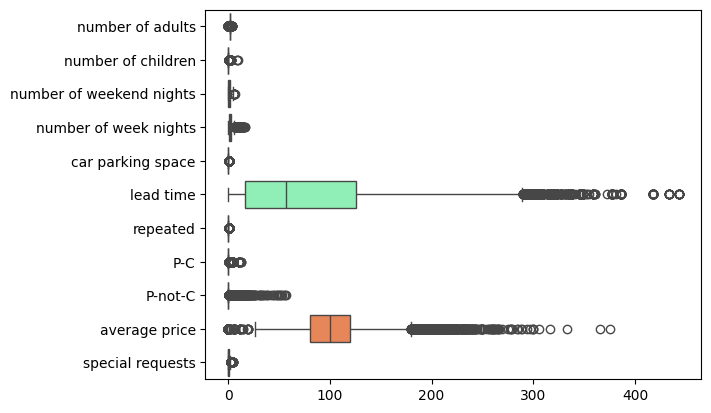

In [ ]:
sns.boxplot(data=df,palette='rainbow',orient='h')

/tmp/ipython-input-12-1502431589.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['lead time'])


<Axes: xlabel='lead time', ylabel='Density'>

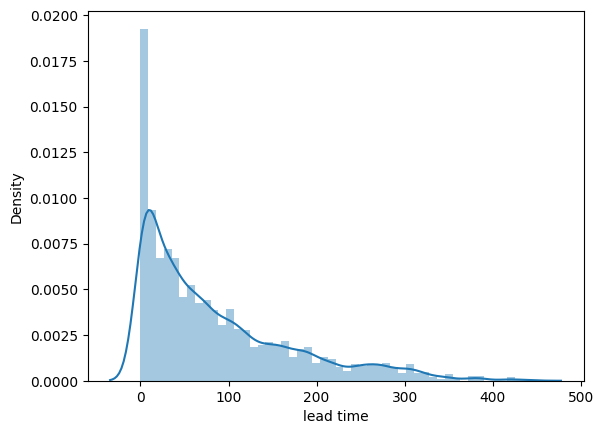

In [ ]:
sns.distplot(df['lead time'])

/tmp/ipython-input-13-2856529824.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['average price'])


<Axes: xlabel='average price', ylabel='Density'>

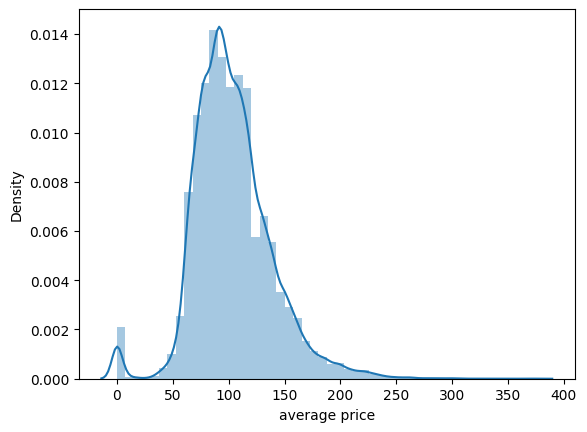

In [ ]:
sns.distplot(df['average price'])

In [ ]:
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower, lower, df[column])
    df[column] = np.where(df[column] > upper, upper, df[column])
    return df

# Apply capping to all numeric columns
target_goal = df[['lead time','average price']]

for col in target_goal:
    df = cap_outliers_iqr(df, col)


<Axes: >

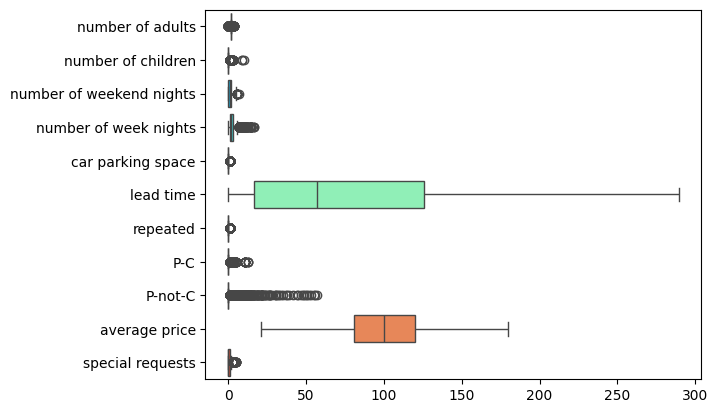

In [ ]:
sns.boxplot(data=df,palette='rainbow',orient='h')

In [ ]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df = pd.get_dummies(df, columns=['market segment type', 'room type', 'type of meal'], drop_first=True,dtype=int)
le = LabelEncoder()
df['booking status'] = le.fit_transform(df['booking status'])
df.head()


/tmp/ipython-input-16-3670790993.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,...,market segment type_Online,room type_Room_Type 2,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,type of meal_Meal Plan 2,type of meal_Meal Plan 3,type of meal_Not Selected
0,INN00001,1,1,2,5,0,224.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,INN00002,1,0,1,3,0,5.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
2,INN00003,2,1,1,3,0,1.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
3,INN00004,1,0,0,2,0,211.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,0
4,INN00005,1,0,1,2,0,48.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1


In [ ]:
df.drop(columns=['Booking_ID','date of reservation'],axis=1,inplace=True)
df

,number of adults,number of children,number of weekend nights,number of week nights,car parking space,lead time,repeated,P-C,P-not-C,average price,...,market segment type_Online,room type_Room_Type 2,room type_Room_Type 3,room type_Room_Type 4,room type_Room_Type 5,room type_Room_Type 6,room type_Room_Type 7,type of meal_Meal Plan 2,type of meal_Meal Plan 3,type of meal_Not Selected
0,1,1,2,5,0,224.0,0.0,0.0,0.0,88.00,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,3,0,5.0,0.0,0.0,0.0,106.68,...,1,0,0,0,0,0,0,0,0,1
2,2,1,1,3,0,1.0,0.0,0.0,0.0,50.00,...,1,0,0,0,0,0,0,0,0,0
3,1,0,0,2,0,211.0,0.0,0.0,0.0,100.00,...,1,0,0,0,0,0,0,0,0,0
4,1,0,1,2,0,48.0,0.0,0.0,0.0,77.00,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23469,1,0,0,1,0,2.0,0.0,0.0,0.0,67.00,...,0,0,0,0,0,0,0,0,0,0
23470,2,0,2,2,0,32.0,0.0,0.0,0.0,134.78,...,1,0,0,1,0,0,0,0,0,0
23471,1,0,1,4,0,23.0,0.0,0.0,0.0,92.00,...,1,0,0,0,0,0,0,0,0,0
23472,2,0,2,1,0,145.0,0.0,0.0,0.0,94.50,...,0,0,0,0,0,0,0,1,0,0


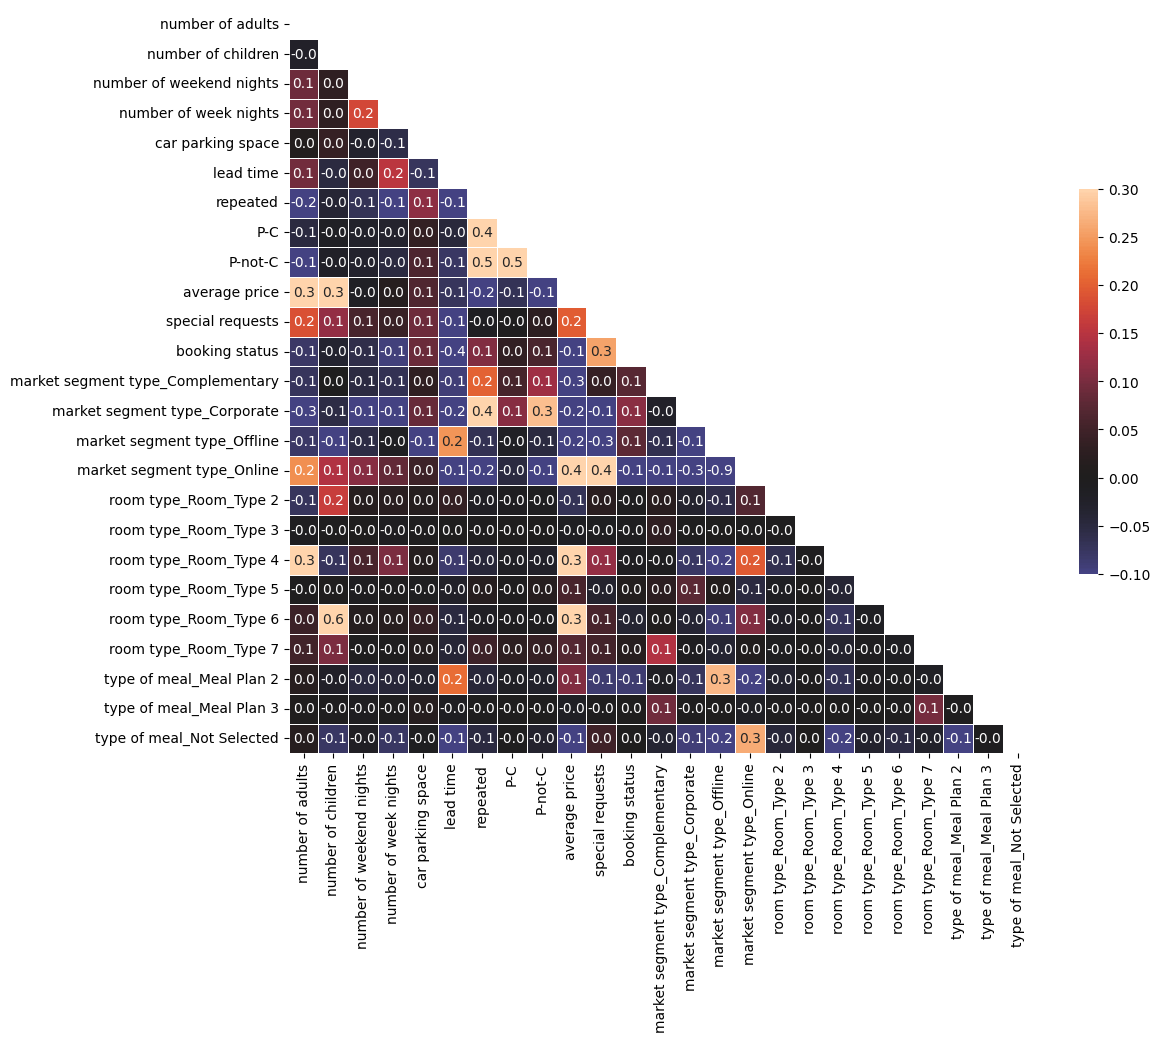

In [ ]:
plt.figure(figsize=(12,10))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(
    df.corr(),
    mask=mask,
    annot=True,
    fmt=".1f",
    center=0,
    vmax=0.3,
    vmin=-0.1,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5}
)
plt.savefig('heatmap.png')

In [ ]:
df['total_guests'] = df['number of adults'] + df['number of children']
df['stay_duration'] = df['number of weekend nights'] + df['number of week nights']
df['guest_density'] = df['total_guests'] / (df['stay_duration'] + 1)
df['is_family'] = (df['number of children'] > 0).astype(int)
df['lead_time_category'] = pd.cut(df['lead time'], bins=[-1, 7, 30, 90, 9999], labels=['very_short', 'short', 'medium', 'long'])
df = pd.get_dummies(df, columns=['lead_time_category'], drop_first=True, dtype=int)


In [ ]:
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop_corr = [col for col in upper.columns if any(upper[col] > 0.85)]
df.drop(columns=to_drop_corr, inplace=True)
print("Dropped columns due to correlation:", to_drop_corr)


Dropped columns due to correlation: ['market segment type_Online', 'stay_duration', 'is_family']


In [ ]:
X = df.drop('booking status', axis=1)
y = df['booking status']


In [ ]:
print(y.value_counts())
print(y.value_counts(normalize=True) * 100)

booking status
1    15795
0     7652
Name: count, dtype: int64
booking status
1    67.364695
0    32.635305
Name: proportion, dtype: float64


In [ ]:
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X, y)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"PCA reduced features from {X.shape[1]} to {X_train_pca.shape[1]}")


PCA reduced features from 28 to 22


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_pca, y_train)
y_pred = logreg.predict(X_test_pca)


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8015194681861348
Confusion Matrix:
 [[2581  545]
 [ 709 2483]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.83      0.80      3126
           1       0.82      0.78      0.80      3192

    accuracy                           0.80      6318
   macro avg       0.80      0.80      0.80      6318
weighted avg       0.80      0.80      0.80      6318



In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)

print("Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Results:
Accuracy: 0.9096232985121874

Confusion Matrix:
 [[2850  276]
 [ 295 2897]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91      3126
           1       0.91      0.91      0.91      3192

    accuracy                           0.91      6318
   macro avg       0.91      0.91      0.91      6318
weighted avg       0.91      0.91      0.91      6318

